In [1]:
import numpy as np
from keras.applications.vgg16 import VGG16

from numpy import savetxt
from numpy import loadtxt
import cv2
from google.colab.patches import cv2_imshow
import argparse
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import scipy.io
import scipy.misc
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
from keras import backend as K
from keras.layers import Input, Lambda, Conv2D
from keras.models import load_model, Model

import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Model, load_model, Sequential
from keras.preprocessing import image
from keras.utils import layer_utils, np_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
from skimage.transform import resize


from keras.optimizers import Adam



Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [2]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [3]:
import glob

# Importing drive method from colab for accessing google drive
from google.colab import drive

In [4]:
# Mounting drive
# This will require authentication : Follow the steps as guided
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
Y = loadtxt('/content/drive/My Drive/rps_dataset/Y.csv')
Y=np.reshape(Y,(4796,1))
Y = Y.astype(int)
Y1=Y
Y=get_one_hot(Y,4)
Y=np.reshape(Y,(4796,4))
print(Y[0])

[0. 0. 1. 0.]


In [6]:
labels = []
for i in Y1:
  if i == 0:
    labels.append('None')
  if i == 1:
    labels.append('Rock')
  if i == 2:
    labels.append('Paper')
  if i == 3:
    labels.append('Scissors')
labels=np.array(labels)

print(labels)

['Paper' 'None' 'Rock' ... 'Paper' 'Paper' 'Rock']


In [7]:
X = np.load('/content/drive/My Drive/rps_dataset/X.npy')

  

In [8]:



X_resize = np.zeros((4796,128,128,3),dtype=np.float64)
for i in range(4796):
  X_resize[i]=cv2.resize(X[i],(128,128))




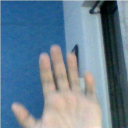

Paper


In [9]:
cv2_imshow(X_resize[0])
print(labels[0])

In [10]:
tf.keras.applications.resnet.preprocess_input(
    X, data_format=None
)
train_size=int(0.8*X.shape[0])
X_train = X_resize[:train_size]
X_train = X_train
Y_train = Y[:train_size]
X_test  = X_resize[train_size:]
X_test = X_test
Y_test  = Y[train_size:]
print(Y_train.shape)


(3836, 4)


(128, 128, 3)
(3836, 128, 128, 3)
[[[[185. 179. 161.]
   [167. 145. 104.]
   [166. 143. 107.]
   ...
   [200. 195. 183.]
   [200. 197. 187.]
   [199. 198. 189.]]

  [[168. 141. 115.]
   [143.  87.  32.]
   [143.  90.  32.]
   ...
   [183. 164. 153.]
   [181. 167. 155.]
   [178. 166. 154.]]

  [[168. 141. 111.]
   [147.  90.  37.]
   [146.  91.  36.]
   ...
   [182. 167. 154.]
   [178. 171. 154.]
   [177. 173. 155.]]

  ...

  [[176. 157. 129.]
   [158. 110.  62.]
   [157. 110.  59.]
   ...
   [ 57.  60.  39.]
   [ 72.  75.  46.]
   [ 86.  83.  58.]]

  [[175. 157. 130.]
   [157. 110.  59.]
   [156. 112.  54.]
   ...
   [ 69.  59.  40.]
   [ 91.  80.  58.]
   [ 97.  84.  71.]]

  [[178. 159. 133.]
   [158. 116.  58.]
   [155. 114.  45.]
   ...
   [ 83.  66.  37.]
   [ 97.  81.  50.]
   [103.  87.  63.]]]


 [[[254. 254. 255.]
   [255. 255. 254.]
   [255. 255. 254.]
   ...
   [255. 254. 254.]
   [255. 255. 254.]
   [254. 254. 253.]]

  [[253. 254. 253.]
   [ 10.   3.   0.]
   [ 11.   6. 

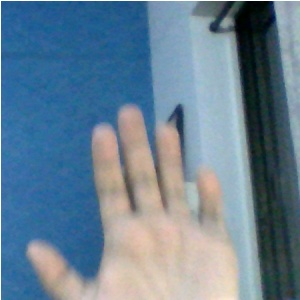

In [11]:
input_shape=(3836,128,128,3)
print(input_shape[1:])

print(X_train.shape)
print(X_train)
cv2_imshow(X[0])

In [12]:
#import keras
#mobile =keras.applications.mobilenet.MobileNet()
#model = Sequential()
#model.add(mobile(input_shape=input_shape[1:],include_top=False))


new_input = Input(shape=(128, 128,3))
model = Sequential()
model.add(tf.keras.applications.ResNet50(
    weights=None,
    input_tensor=new_input,
    input_shape=None,
    pooling='avg',
    include_top=False
  
))

model.add(Dense(64, activation='relu'))

model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=4, batch_size=32,verbose=1)

Epoch 1/4
120/120 [==============================] - 15s 122ms/step - loss: 0.3879 - accuracy: 0.9129
Epoch 2/4
120/120 [==============================] - 14s 120ms/step - loss: 0.1019 - accuracy: 0.9739
Epoch 3/4
120/120 [==============================] - 15s 121ms/step - loss: 0.0419 - accuracy: 0.9864
Epoch 4/4
120/120 [==============================] - 15s 123ms/step - loss: 0.0017 - accuracy: 0.9997


In [13]:

test_loss,test_acc = model.evaluate(X_test,Y_test)

30/30 [==============================] - 1s 36ms/step - loss: 0.0356 - accuracy: 1.0000


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 64)                131136    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 23,719,108
Trainable params: 23,665,988
Non-trainable params: 53,120
_________________________________________________________________


In [16]:
model.save('mode.h5')